In [1]:
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
n_neighbors = 1
data = pd.read_csv(os.path.join('..','Data','CrowdstormingDataJuly1st.csv'))
data = data.dropna()
X =  data[['height','weight','goals','yellowCards','yellowReds','redCards']].values
y = data[['position']].values
posd = pd.Series(data.position,dtype="category")
posd.unique()
y = posd.cat.rename_categories(range(0,12))
y = y.to_frame()
y = y.values
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(round(.8*len(indices)))],indices[int(round(.8*len(indices))):]
training_X = X[training_idx,:]
training_y = y[training_idx].reshape(len(training_idx),)
test_X = X[test_idx,:]
test_y = y[test_idx].reshape(len(test_idx),)

In [7]:
data.keys()

Index([u'playerShort', u'player', u'club', u'leagueCountry', u'birthday',
       u'height', u'weight', u'position', u'games', u'victories', u'ties',
       u'defeats', u'goals', u'yellowCards', u'yellowReds', u'redCards',
       u'photoID', u'rater1', u'rater2', u'refNum', u'refCountry', u'Alpha_3',
       u'meanIAT', u'nIAT', u'seIAT', u'meanExp', u'nExp', u'seExp'],
      dtype='object')

In [3]:
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(training_X, training_y)
predicted = clf.predict(test_X)
np.mean(predicted == test_y)

0.49053743882898099

In [4]:
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(training_X, training_y)
predicted = clf.predict(test_X)
np.mean(predicted == test_y)

0.49053743882898099

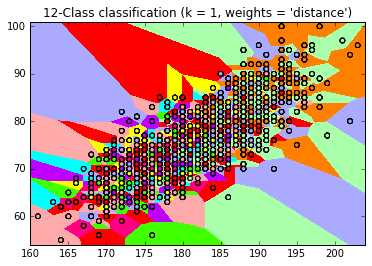

In [5]:
# Redo in 2 dimensions
X =  data[['height','weight']].values
y = data[['position']].values
posd = pd.Series(data.position,dtype="category")
posd.unique()
y = posd.cat.rename_categories(range(0,12))
y = y.to_frame()
y = y.values
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(round(.8*len(indices)))],indices[int(round(.8*len(indices))):]
training_X = X[training_idx,:]
training_y = y[training_idx].reshape(len(training_idx),)
test_X = X[test_idx,:]
test_y = y[test_idx].reshape(len(test_idx),)
weights = 'uniform'
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(training_X, training_y)

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
X = test_X[:,0:2]
y = test_y
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])
cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])

# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("12-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))
plt.show()

In [12]:
predicted = clf.predict(test_X)
np.mean(predicted == test_y)

0.45112814516478283

In [13]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 968  131  138   82  207    0  177  158   21  118   12  124]
 [ 190 1729  540  135  434  514  134   23   91  228   15   23]
 [ 140  242 1815   88  332  184  177   71   18  241   13   43]
 [ 102   12  116  346   55   45  120   45   17   89   14   17]
 [ 177  180  395   18 1230  179  210  155   63   74   28   76]
 [   8  414  166  111  139 1218   37    2    0   79    0    0]
 [ 177   69  147   65  175  139  735   61   12  119   50   49]
 [  92   18   72   89  124   15   59  629   38   80   59    0]
 [ 111   51   72   42   61   19   44    0  368   88   36    8]
 [ 100  103  153   50  119   16  242  126   20  645   42   66]
 [ 142   15   81   63  163    7   10   30   27   41  317   26]
 [  44   26  168   13   54   14  121   92   32   40    0  417]]
Normalized confusion matrix
[[ 0.45  0.06  0.06  0.04  0.1   0.    0.08  0.07  0.01  0.06  0.01  0.06]
 [ 0.05  0.43  0.13  0.03  0.11  0.13  0.03  0.01  0.02  0.06  0.    0.01]
 [ 0.04  0.07  0.54  0.03

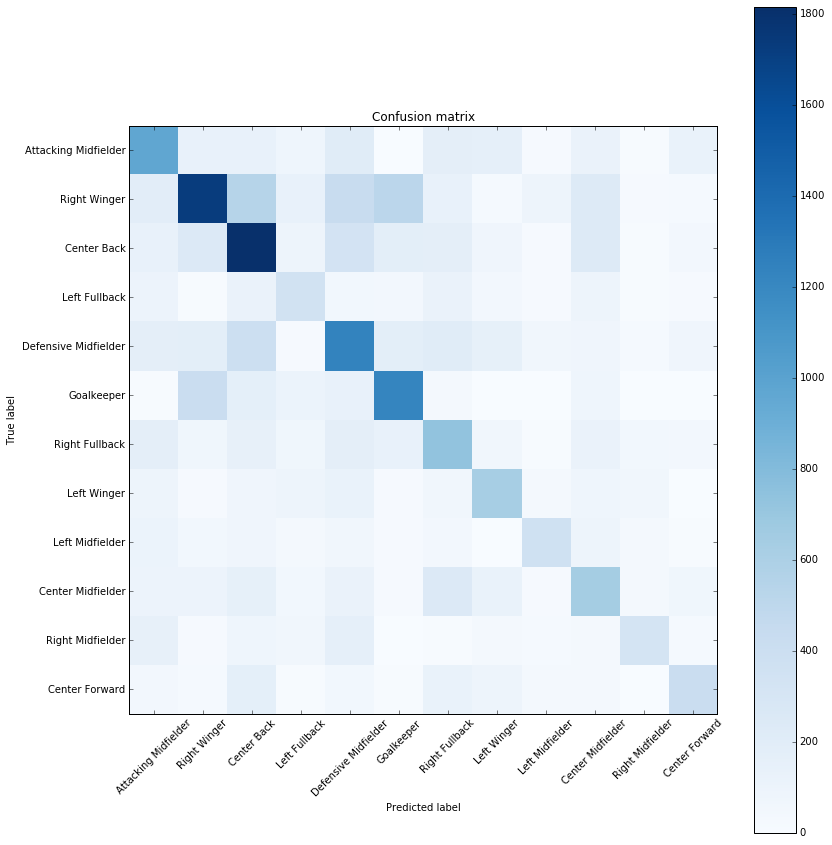

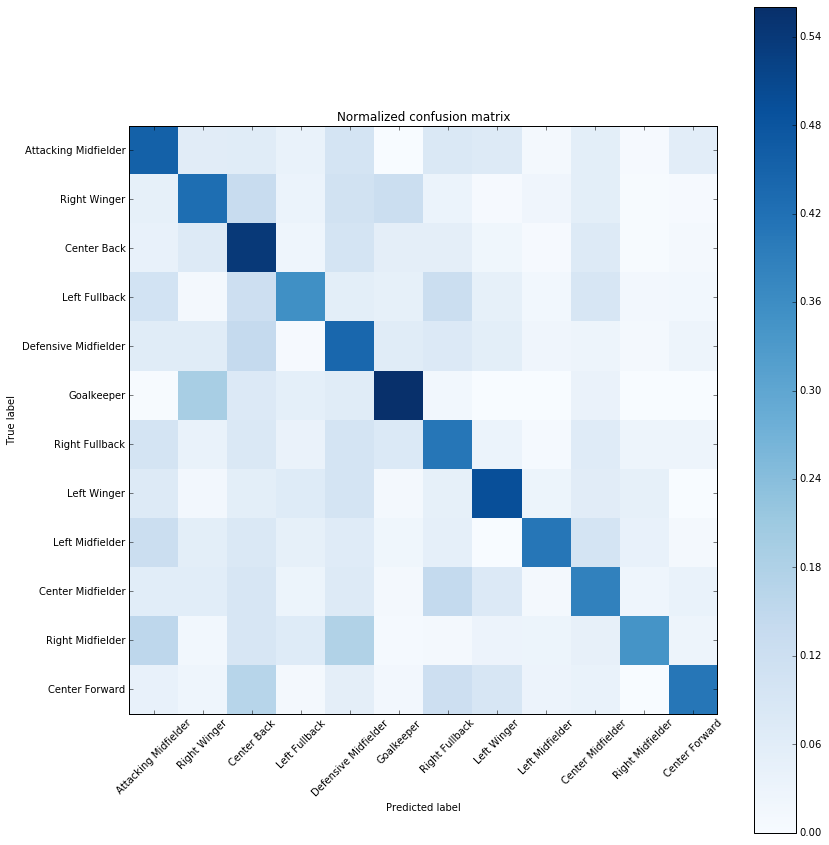

In [14]:
# Compute confusion matrix
cm = confusion_matrix(test_y, predicted)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

names = posd.unique()

plt.figure(figsize=(12,12))
plot_confusion_matrix(cm,names,title = 'Confusion matrix')

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cm_normalized,names, title='Normalized confusion matrix')

plt.show()

## Other classification models
Linear SVM

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [ ]:
# Linear SVM
clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf.fit(training_X, training_y)

In [9]:
predicted = clf.predict(test_X)
np.mean(predicted == test_y)

0.22736130960114331

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
X = test_X[:,0:2]
y = test_y
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])
cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])

# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))
plt.show()

In [ ]:
# Naive Bayesian classifier
from sklearn.naive_bayes import GaussianNB
clf =  GaussianNB()
clf.fit(training_X, training_y)

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
X = test_X[:,0:2]
y = test_y
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])
cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFAAAA', 
                             '#ff0000', '#ff8000','#ffff00', '#40ff00', 
                             '#00ffff','#bf00ff', '#ff0080', '#ff0000'])

# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))
plt.show()